In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD


import os
import wandb
from wandb.keras import WandbCallback

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(class_names)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(type(int(y_train[0])))


import matplotlib.pyplot as plt
offset = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i+offset], cmap='gray', interpolation='none')
    plt.title(class_names[int(y_train[i+offset])])
    plt.axis('off')
    
# Convert class vectors to binary class matrices.
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
#print(y_train[0])

    


Using TensorFlow backend.


<class 'int'>


Text(0.5, 1.0, 'frog<- original')

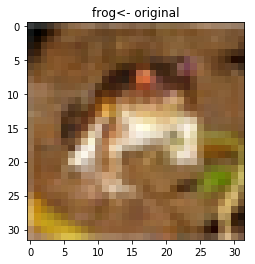

In [5]:
height, width = X_train[0].shape[:2]
i=0
plt.subplot(1,1,i+1)
plt.imshow(X_train[i+offset], cmap='gray', interpolation='none')
plt.title(class_names[int(y_train[i+offset])] + "<- original")



Text(0.5, 1.0, 'frog<- 2x size')

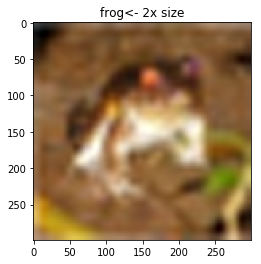

In [4]:

import cv2
dst = cv2.resize(X_train[0], (299, 299), interpolation = cv2.INTER_CUBIC)
plt.subplot(1,1,i+1)
plt.imshow(dst, cmap='gray', interpolation='none')
plt.title(class_names[int(y_train[i+offset])] + "<- 2x size")


In [9]:
print('Predicted InceptionV3')
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np



Predicted InceptionV3


In [11]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

model1 = InceptionV3(weights='imagenet')
x = image.img_to_array(dst)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#model.summary()
preds1 = model1.predict(x)
print('Predicted InceptionV3:', decode_predictions(preds1, top=3)[0])

Predicted InceptionV3: [('n07590611', 'hot_pot', 0.15952301), ('n07584110', 'consomme', 0.09813634), ('n04111531', 'rotisserie', 0.025024602)]


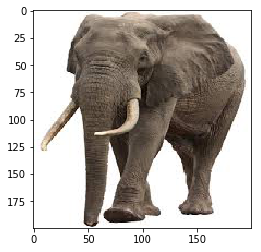

In [15]:
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(200, 200))

plt.subplot(1,1,1)
plt.imshow(img, cmap='gray', interpolation='none')



In [19]:
import numpy as np
dst1=np.empty((0))
dst1=np.zeros((2,4,4,3))

print(dst1.shape[0])

2


In [15]:
from keras.datasets import cifar10
import numpy as np
import cv2
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

dst = np.zeros((X_train.shape[0],299,299,3))
print(dst.shape)
print(X_train.shape)
print(X_train.shape[0])
for i in range(100):
    dst[i] =cv2.resize(X_train[i], (299,299), interpolation = cv2.INTER_CUBIC)
print((cv2.resize(X_train[i], (299,299), interpolation = cv2.INTER_CUBIC)).shape)
print(i, 'next')
print(dst.shape)


(50000, 299, 299, 3)
(50000, 32, 32, 3)
50000
(299, 299, 3)
99 next
(50000, 299, 299, 3)


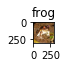

In [16]:
import matplotlib.pyplot as plt
offset = 0
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(class_names)

for i in range(1):
    dst[i] =cv2.resize(X_train[i], (299,299), interpolation = cv2.INTER_CUBIC)
    plt.subplot(9,1,i+1)
    dst[i] = dst[i].astype('float32') / 255.
    plt.imshow(dst[i], cmap='gray', interpolation='none')
    plt.title(class_names[int(y_train[i+offset])])

from keras.datasets import cifar10
import numpy as np
import cv2
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
import pickle
f = open('X_train_resized.pckl', 'rb')
X_train_resized=pickle.load(f)
f.close()
f = open('X_test_resized.pckl', 'rb')
X_test_resized=pickle.load(f)
f.close()

import matplotlib.pyplot as plt
offset = 0
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(class_names)
k=20
for i in range(k):
    plt.subplot(k,1,i+1)
    plt.imshow(X_train_resized[i], cmap='gray', interpolation='none')
    plt.title(class_names[int(y_train[i+offset])])

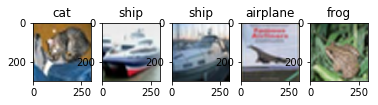

In [10]:
from keras.datasets import cifar10
import numpy as np
import cv2
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
import pickle
f = open('X_train_resized.pckl', 'rb')
X_train_resized=pickle.load(f)
f.close()
f = open('X_test_resized.pckl', 'rb')
X_test_resized=pickle.load(f)
f.close()

import matplotlib.pyplot as plt
offset = 0
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(class_names)
k=5
for i in range(k):
    plt.subplot(1,k,i+1)
    plt.imshow(X_test_resized[i], cmap='gray', interpolation='none')
    plt.title(class_names[int(y_test[i+offset])])

In [11]:
1/2


0.5

In [12]:
1//4

0

In [13]:
5//4


1

In [62]:
import keras
from keras.datasets import cifar10
import numpy as np
import cv2
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
import pickle
f = open('X_train_resized.pckl', 'rb')
X_train_resized=pickle.load(f)
f.close()
f = open('X_test_resized.pckl', 'rb')
X_test_resized=pickle.load(f)
f.close()


print(y_test.shape)
print(y_train.shape)

print(X_test.shape)
print(X_train.shape)

print(y_test[:100].shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_test.shape)
print(y_train.shape)

print(X_test.shape)
print(X_train.shape)

print(y_test[:10].shape)
print(y_test[:10])



X_train_resized = np.zeros((1,32,32,3))
for i in range(1):
    X_train_resized[i,0,0,:] = X_train[i,0,0,:]

print(X_train_resized)


(10000, 1)
(50000, 1)
(10000, 32, 32, 3)
(50000, 32, 32, 3)
(100, 1)
(10000, 10)
(50000, 10)
(10000, 32, 32, 3)
(50000, 32, 32, 3)
(10, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[[[59. 62. 63.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ...
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ...
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ...
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  ...

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ...
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]
   ...
   [ 0.  0.  0.]
   

In [51]:
print(y_test[:5])

dst = np.random.rand(3,4)
print(dst)
dst[0] = 2* dst[0]
dst[1] = 10* dst[0]
#dst[10] = (0,1,2,3,4,5,6,7,8,9)
print(dst)
print('hello')
print(dst[:2])
print(dst.shape)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[[0.50016994 0.23256445 0.10902938 0.5855921 ]
 [0.17333513 0.83367218 0.65914523 0.10859258]
 [0.72949528 0.08123267 0.09596072 0.13960064]]
[[ 1.00033989  0.4651289   0.21805876  1.17118421]
 [10.00339887  4.65128899  2.18058758 11.71184208]
 [ 0.72949528  0.08123267  0.09596072  0.13960064]]
hello
[[ 1.00033989  0.4651289   0.21805876  1.17118421]
 [10.00339887  4.65128899  2.18058758 11.71184208]]
(3, 4)
